# <font style = "color:rgb(50,120,229)">Thresholding</font>

In many computer vision tasks, we need to process a binary image. 

A binary image consists of pixels that are either completely black ( pixel value 0 ) or completely white ( pixel value 255 ). It is easier to come up with algorithms which work on binary images. One of the easiest ways of creating Binary images from grayscale images is using **Thresholding**.

# <font style="color:rgb(50,120,229)">Import Libraries </font>

In [24]:
import cv2, time
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [26]:
!pwd

/home/ccc_0d5222dec3_5880/asn56480_13/asn56481_1/work


# <font style="color:rgb(50,120,229)">Load Image and display </font>

In [18]:
# Read an image in grayscale
imagePath = DATA_PATH + '/images/threshold.png'
src = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)


# Set threshold and maximum value
thresh = 30
maxValue = 255

Till now we have looked at operations on image as a whole or a range of pixels. 
Let us see how to do pixel wise operations on images using thresholding as an example.

# <font style="color:rgb(50,120,229)">Thresholding using for loops</font>
We had seen the pseudo code for Binary Thresholding in the previous video. Let us implement the same.

We have written a function which contains the code for thresholding. The function takes three arguments which we discussed in the video. The output is a thresholded image.

We also compute the time taken by the thresholding operation using the time module.

Time taken = 0.6387584209442139 seconds


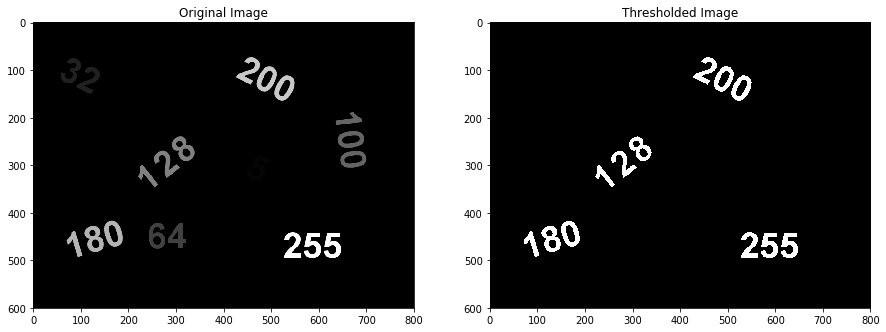

In [4]:
def thresholdUsingLoop(src, thresh, maxValue):
    # Create a output image
    dst = src.copy()
    height,width = src.shape[:2]

    # Loop over rows
    for i in range(height):
        # Loop over columns
        for j in range(width):
            if src[i,j] > thresh:
                dst[i,j] = maxValue
            else:
                dst[i,j] = 0
                
    return dst

t = time.time()
dst = thresholdUsingLoop(src, thresh, maxValue)
print("Time taken = {} seconds".format(time.time() - t))

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Original Image");
plt.subplot(122);plt.imshow(dst);plt.title("Thresholded Image");

We can se that the output is as expected. But the time taken by the operation is huge. It should not take ~1 second to perform such a simple operation on an image.

We will see how to improve the execution time in the next unit using numpy operations.

# <font style="color:rgb(50,120,229)">Thresholding using Vectorized operations</font>
In the previous unit, we saw that the thresholding operation took a long time to execute. This is because we were using for loops which is a very inefficient way of handling arrays in python. 

To make the code more efficient, We should use vectorized computation available in numpy. Specifically, we can compare the whole image with the threshold instead of comparing each pixel, thanks to Numpy. Please read about [**numpy array programming**](https://realpython.com/numpy-array-programming/).

Time taken = 0.0006184577941894531 seconds


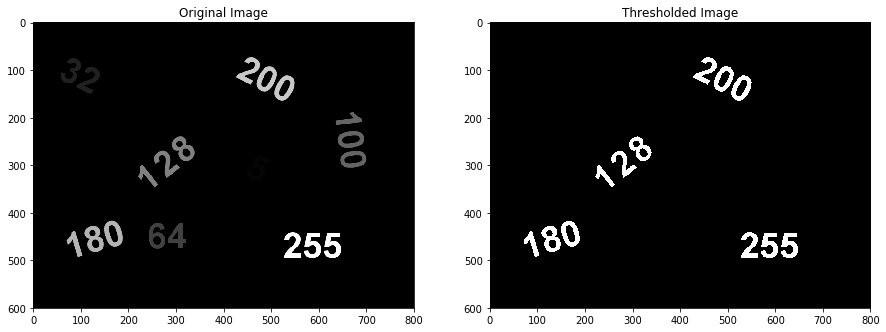

In [7]:
def thresholdUsingVectors(src, thresh, maxValue):
    # Create a black output image ( all zeros )
    dst = np.zeros_like(src)
    
    # Find pixels which have values>threshold value
    thresholdedPixels = src>thresh
    
    # Assign those pixels maxValue
    dst[thresholdedPixels] = maxValue
    
    return dst

t = time.time()
dst = thresholdUsingVectors(src, thresh, maxValue)
print("Time taken = {} seconds".format(time.time() - t))

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Original Image");
plt.subplot(122);plt.imshow(dst);plt.title("Thresholded Image");

As you can see the code is much shorter and way more efficient than the one which uses for loops.

You might be wondering, whether you have to write every algorithm from scratch? The answer is 'NO' for most standard algorithms. OpenCV has many algorthms implemented in a very optimized way which one can use in their projects. Thresholding is one such example where we can simply use an OpenCV function and not worry about the implementation correctness and efficiency. We will see how to do it in the next unit.

# <font style="color:rgb(50,120,229)">Thresholding using OpenCV function</font>
We discussed about using loops and vector operations for performing thresholding in the previous units. Let us see how we can use the OpenCV function `cv2.threshold` to perform thresholding and then we'll also discuss whether we should use OpenCV functions or write our own functions.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

[**cv2.threshold**](https://docs.opencv.org/4.1.0/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) has the following syntax : 

`
retval, dst = cv.threshold(src, thresh, maxval, type[, dst])
`

Where,

Input:
- `src` is the input array ot image (multiple-channel, 8-bit or 32-bit floating point).
- `thresh` is the threshold value.
- `maxval` is the maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
- `type` is thethresholding type ( THRESH_BINARY, THRESH_BINARY_INV, etc )

Output:
- `dst` is the output array or image of the same size and type and the same number of channels as src.
- `retval`  is the threshold value if you use other thresholding types such as Otsu or Triangle 


Time taken = 0.0002582073211669922 seconds


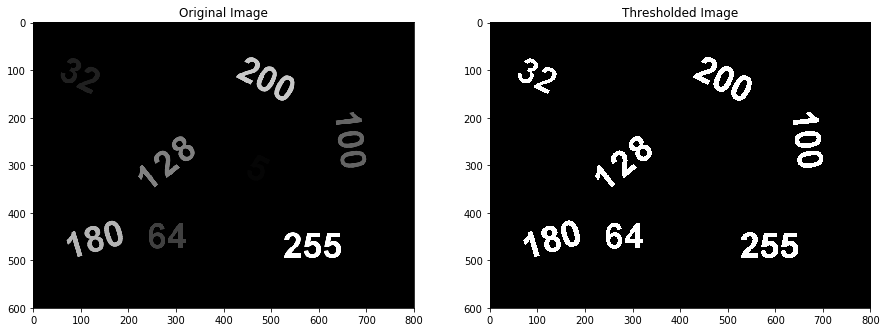

In [19]:
t = time.time()
th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
print("Time taken = {} seconds".format(time.time() - t))

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Original Image");
plt.subplot(122);plt.imshow(dst);plt.title("Thresholded Image");

## <font style="color:rgb(50,120,229)">Comparison of runtimes for OpenCV function vs our implementation </font>
Let us compare the three implementations we discussed so far for thresholding operation with respect to the execution time.

In [6]:
time_opencv = 0
time_loops = 0
time_vector = 0
n_samples = 10
for i in range(n_samples):
    
    t = time.time()
    dst = thresholdUsingLoop(src, thresh, maxValue)
    time_loops += time.time() - t
    
    t = time.time()
    dst = thresholdUsingVectors(src, thresh, maxValue)
    time_vector += time.time() - t
    
    t = time.time()
    th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
    time_opencv += time.time() - t

print("Average time taken by For Loop Code = {} seconds".format(time_loops/n_samples))
print("Average time taken by Vectorized Code = {} seconds".format(time_vector/n_samples))
print("Average time taken by OpenCV Code = {} seconds".format(time_opencv/n_samples))

Average time taken by For Loop Code = 0.6518998622894288 seconds
Average time taken by Vectorized Code = 0.0003210306167602539 seconds
Average time taken by OpenCV Code = 0.019338369369506836 seconds


Clearly, we can see that the vectorized code is much better than the code that uses loops. 

The OpenCV function is even faster than the one we wrote using numpy.

This is because they have written highly optimized code and made further optimizations based on the system architectre and Operating system you are using. It is highly recommeneded to use OpenCV functions instead of writing your own algorithm from scratch if it is already available in OpenCV. 

## <font style="color:rgb(250,0,0)">Warning </font>
#### <font style = "color:rgb(200,0,0)">Never use for loops in python code unless absolutely neessary </font>

# <font style="color:rgb(50,120,229)">Other Thresholding types </font>
We have already discussed the pseudo code of the other thresholding algorithms in the video. In this unit, we will discuss in brief about how to use the code for the other types of thresholding.

In [8]:
thresh = 100
maxValue = 150

## <font style="color:rgb(50,120,229)">Binary Thresholding </font>

In [8]:
th, dst_bin = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)

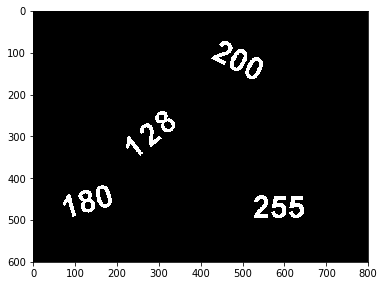

In [9]:
plt.imshow(dst_bin)

## <font style="color:rgb(50,120,229)">Inverse Binary Thresholding </font>

In [11]:
th, dst_bin_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY_INV)

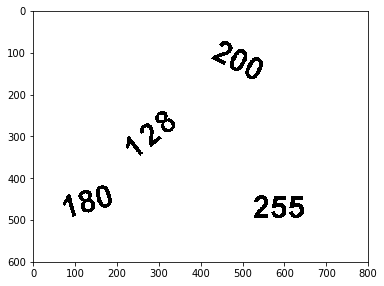

In [12]:
plt.imshow(dst_bin_inv)

## <font style="color:rgb(50,120,229)">Truncate Thresholding </font>

In [14]:
th, dst_trunc = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TRUNC)

## <font style="color:rgb(50,120,229)">Threshold to Zero </font>

In [15]:
th, dst_to_zero = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO)

## <font style="color:rgb(50,120,229)">Inverted Threshold to Zero</font>

In [16]:
th, dst_to_zero_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO_INV)

## <font style="color:rgb(50,120,229)">Display and Compare </font>

Threshold Value = 100, Max Value = 255


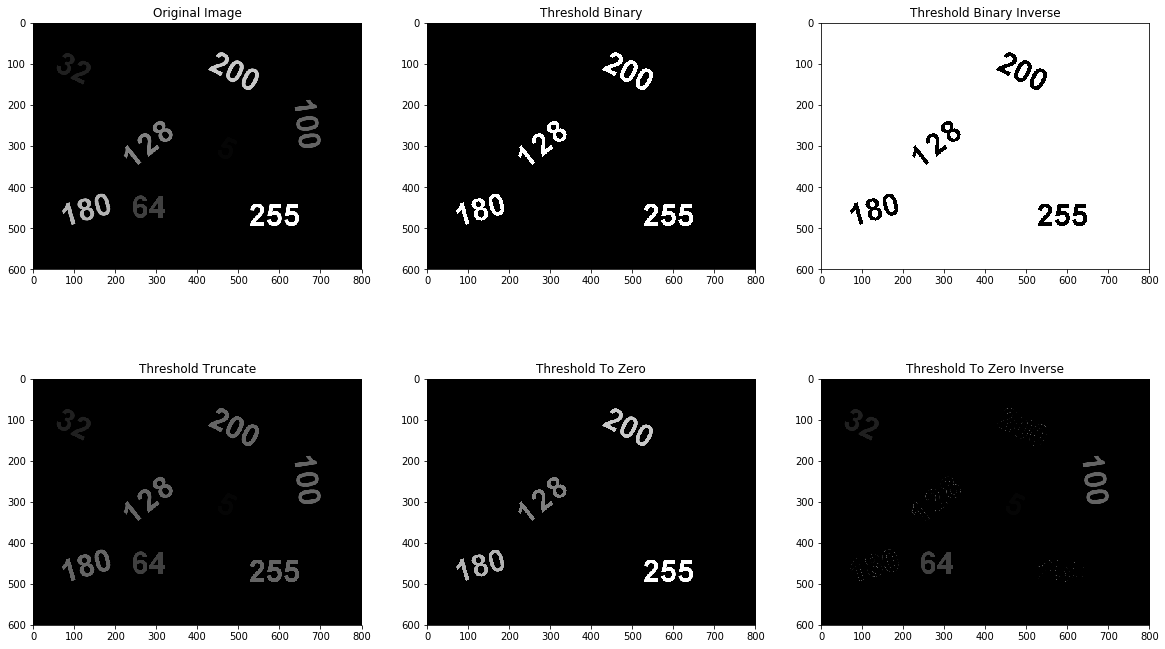

In [17]:
print("Threshold Value = {}, Max Value = {}".format(thresh, maxValue))
plt.figure(figsize=[20,12])
plt.subplot(231);plt.imshow(src, cmap='gray', vmin=0, vmax=255);plt.title("Original Image");
plt.subplot(232);plt.imshow(dst_bin, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary");
plt.subplot(233);plt.imshow(dst_bin_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Inverse");
plt.subplot(234);plt.imshow(dst_trunc, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Truncate");
plt.subplot(235);plt.imshow(dst_to_zero, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero");
plt.subplot(236);plt.imshow(dst_to_zero_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero Inverse");

## <font style="color:rgb(50,120,229)">Thresholding in the presence of Noise</font>
There are two more methods in OpenCV which handle the presence of Noise while doing thresholding. They are :
1. Adaptive Thresholding
1. Otsu's Thresholding

We will cover these techniques in the upcoming weeks as you need to understand a few other concepts ( like Histograms, Image Noise and Blurring ) in order to understand the unique aspects of Otsu's Thresholding. 

If you already know about the above mentioned concepts and want to learn about these thresholding technques, [please go through this tutorial](https://docs.opencv.org/4.1.0/d7/d4d/tutorial_py_thresholding.html).


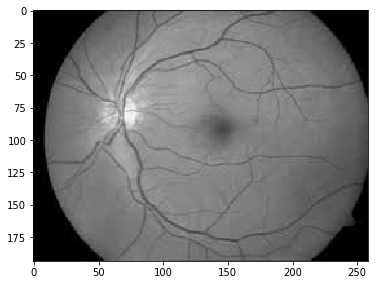

In [28]:
imagePath1 = 'retina.jpg'
src1 = cv2.imread(imagePath1, cv2.IMREAD_GRAYSCALE)
if src1.any() == None:
    print("No image is detected")
else:
    plt.imshow(src1, cmap='gray', vmin=0, vmax=255)

In [46]:
# Set threshold and maximum value
thresh = 125
maxValue = 255

In [36]:
print(src1.min(),src1.max())

0 254


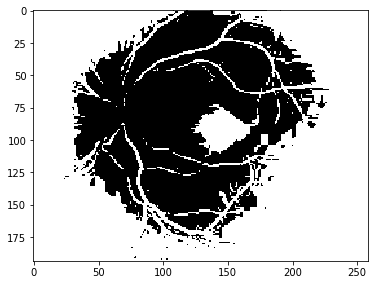

In [47]:
th, dst = cv2.threshold(src1, thresh, maxValue, cv2.THRESH_BINARY_INV)
plt.imshow(dst)